In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data   
y = iris.target 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [4]:
nb = GaussianNB()

In [5]:
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [6]:
y_pred = nb.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy Score: 0.9111111111111111

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [10]:
print("=== Multinomial Naive Bayes ===")
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("Accuracy (MultinomialNB):", accuracy_score(y_test, y_pred_mnb))
print("\nClassification Report (MultinomialNB):")
print(classification_report(y_test, y_pred_mnb, target_names=iris.target_names))
print("--------------------------------------------------\n")

=== Multinomial Naive Bayes ===
Accuracy (MultinomialNB): 0.9777777777777777

Classification Report (MultinomialNB):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------



In [14]:
print("=== Effect of Changing test_size ===")
for size in [0.2, 0.3, 0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    nb.fit(X_train, y_train)
    acc = accuracy_score(y_test, nb.predict(X_test))
    print(f"Test size = {size}, Accuracy = {acc:.4f}")
print("--------------------------------------------------\n")

=== Effect of Changing test_size ===
Test size = 0.2, Accuracy = 1.0000
Test size = 0.3, Accuracy = 0.9778
Test size = 0.4, Accuracy = 0.9667
--------------------------------------------------



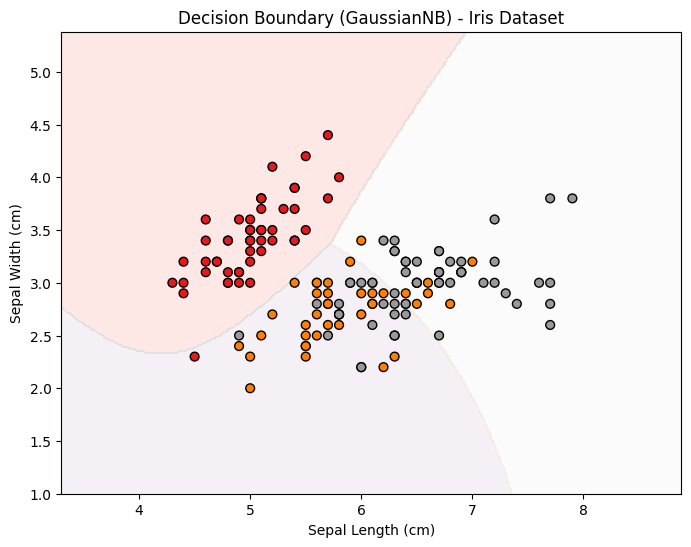

In [18]:
 #Use only first two features (Sepal length, Sepal width)
X = iris.data[:, :2]
y = iris.target

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40, cmap=plt.cm.Set1)
plt.title("Decision Boundary (GaussianNB) - Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()